![](https://storage.googleapis.com/quest_editor_uploads/9aMWaGGxxMBn605YuI1yAqxwof55Adxw.jpg)

Vous utiliserez les données ci-dessous. Créez un dataframe à partir de ces liens :       
- https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv
- https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv

In [1]:
import pandas as pd

url_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
url_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"

df_main = pd.read_csv(url_main)
df_opinion = pd.read_csv(url_opinion)

print(df_main.head())
print(df_opinion.head())


         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

Faite une jointure entre les deux dataframes sur la base de la colonne de date. Le dataframe opinion sera le dataframe de gauche.

In [4]:
#Mettre les lignes "date" au bon format
df_opinion["date"] = pd.to_datetime(df_opinion["date"])
df_main["date"] = pd.to_datetime(df_main["DATE"])

df_merged = df_opinion.merge(df_main, on="date", how="left")
df_merged.head()

,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,...,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
0,2018-01-01,113,0,3,5.1,bad,2018-01-01,12,8,61,...,11,8,8.9,79,9.50,1018,41.750,12,8,7
1,2018-03-12,119,0,2,8.8,bad,2018-03-12,11,9,40,...,11,9,0.8,86,9.00,1007,80.250,11,8,7
2,2018-03-09,116,0,3,10.2,bad,2018-03-09,14,8,27,...,14,12,0.5,90,9.00,1005,65.250,14,11,9
3,2018-10-07,122,0,1,5.6,bad,2018-10-07,16,12,33,...,14,13,0.0,81,10.00,1023,89.625,16,10,11
4,2018-06-18,119,0,1,12.9,bad,2018-06-18,20,16,11,...,18,19,0.1,81,6.75,1026,84.375,20,17,18


Des valeurs sans manquantes après la jointure. Identifiez les colonnes et les lignes concernées et créer un dataframe qui ne contient que les lignes ayant des valeurs manquantes

In [6]:
# Identifier les colonnes sans valeurs
missing_columns = df_merged.columns[df_merged.isna().any()].tolist()
# Identifier les lignes où au moins une valeur est manquante
df_missing = df_merged[df_merged[missing_columns].isna().any(axis=1)]

# Afficher les colonnes concernées et le nombre de lignes impactées
print("Colonnes contenant des valeurs manquantes :", missing_columns)
print("Nombre de lignes concernées :", len(df_missing))
df_missing.head()



Colonnes contenant des valeurs manquantes : []
Nombre de lignes concernées : 0


,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,...,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C


Créer une fonction qui va prédire la valeur de la colonne SUNHOUR sur la base :    
1. Uniquement des colonnes numériques dont la valeur absolue de la corrélation de Pearson est d'au moins **0.5**
2. Sur la base de toutes les colonnes numériques

Vous aurez au préalable splitter les données entre un train et un test split

Vous utiliserez les modèles ci-dessous :
- LinearSVR
- SGDRegressor
- LinearRegression
- KNeighborsRegressor

Faites la moyenne entre le score du train et du test split pour chaque modèle. Pour quelles données et avec quel modèle obtient-on la valeur la plus élevée ?

In [8]:
# Toutes les colonnes numériques
import numpy as np
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns.tolist()
print("Colonnes numériques disponibles :", numeric_cols)

Colonnes numériques disponibles : ['WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C']


In [11]:
# Uniquement des colonnes numériques dont la valeur absolue de la corrélation de Pearson est d'au moins 0.5
df_numeric = df_merged.select_dtypes(include=[np.number])
# Calcul des corrélations avec SUNHOUR
correlations = df_numeric.corr()["SUNHOUR"].dropna()
selected_features = correlations[correlations.abs() >= 0.5].index.tolist()
selected_features.remove("SUNHOUR")

print("Colonnes sélectionnées avec |corr| ≥ 0.5 :", selected_features)


Colonnes sélectionnées avec |corr| ≥ 0.5 : ['MAX_TEMPERATURE_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'HUMIDITY_MAX_PERCENT', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C']


In [16]:
# Split des données train/test (70/30)
#Mélanger les données pour éviter tout biais lié à l'ordre
df_shuffled = df_merged.sample(frac=1, random_state=42)
split_index = int(0.7 * len(df_shuffled))
df_train = df_shuffled.iloc[:split_index]
df_test = df_shuffled.iloc[split_index:]

print(f"Taille du train set : {df_train.shape}")
print(f"Taille du test set : {df_test.shape}")


Taille du train set : (238, 21)
Taille du test set : (103, 21)


In [17]:
# test des modèles
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Liste des modèles
models = {
    "LinearSVR": LinearSVR(max_iter=10000),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5)
}

# Fonction pour entraîner et évaluer un modèle
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_score = r2_score(y_train, model.predict(X_train))
    test_score = r2_score(y_test, model.predict(X_test))
    avg_score = (train_score + test_score) / 2
    return avg_score

# Évaluation des modèles avec les deux jeux de données
results = {}

for name, model in models.items():
    avg_score_all = train_and_evaluate(model, X_all_train, X_all_test, y_train, y_test)
    avg_score_corr = train_and_evaluate(model, X_corr_train, X_corr_test, y_train, y_test)

    results[name] = {"All Features": avg_score_all, "Selected Features": avg_score_corr}

# Affichage des résultats
for model, scores in results.items():
    print(f"{model}:")
    print(f"  - Toutes les colonnes : {scores['All Features']:.4f}")
    print(f"  - Colonnes corrélées : {scores['Selected Features']:.4f}")
    print()


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR:
  - Toutes les colonnes : 0.6686
  - Colonnes corrélées : 0.5062

SGDRegressor:
  - Toutes les colonnes : -106443728472650666399569543168.0000
  - Colonnes corrélées : -819598198412602358366208.0000

LinearRegression:
  - Toutes les colonnes : 0.7265
  - Colonnes corrélées : 0.6744

KNeighborsRegressor:
  - Toutes les colonnes : 0.7370
  - Colonnes corrélées : 0.7044



In [ ]:
# C'est avec KNeighborsRegressor, quand nous prennons toutes les colonnes numériques que la moyenne est la plus élevé

Effectuez une régression polynomiale sur les données :     
1. Uniquement des colonnes numériques dont la valeur absolue de la corrélation de Pearson est d'au moins **0.5**
2. Sur la base de toutes les colonnes numériques

Le score de la régression polynomiale est t'il meilleur que celui des autres modèles ?

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Régression polynomiale sur les colonnes corrélées avec |corr| >= 0.5
poly = PolynomialFeatures(degree=2)
X_corr_train_poly = poly.fit_transform(X_corr_train)
X_corr_test_poly = poly.transform(X_corr_test)

poly_model = LinearRegression()
poly_model.fit(X_corr_train_poly, y_train)

poly_train_score = r2_score(y_train, poly_model.predict(X_corr_train_poly))
poly_test_score = r2_score(y_test, poly_model.predict(X_corr_test_poly))
poly_avg_score = (poly_train_score + poly_test_score) / 2

# Stocker le score de la régression polynomiale sur les features corrélées
results = {
    "Polynomial Regression (Corr)": {
        "Selected Features": poly_avg_score
    }
}

# Régression polynomiale sur toutes les colonnes numériques
X_all_train_poly = poly.fit_transform(X_all_train)
X_all_test_poly = poly.transform(X_all_test)

poly_model_all = LinearRegression()
poly_model_all.fit(X_all_train_poly, y_train)

poly_train_score_all = r2_score(y_train, poly_model_all.predict(X_all_train_poly))
poly_test_score_all = r2_score(y_test, poly_model_all.predict(X_all_test_poly))
poly_avg_score_all = (poly_train_score_all + poly_test_score_all) / 2

# Stocker le score de la régression polynomiale sur toutes les colonnes
results["Polynomial Regression (All)"] = {
    "All Features": poly_avg_score_all
}

# Affichage des résultats pour la régression polynomiale
for model, scores in results.items():
    print(f"{model}:")
    if "All Features" in scores:
        print(f"  - Toutes les colonnes : {scores['All Features']:.4f}")
    if "Selected Features" in scores:
        print(f"  - Colonnes corrélées : {scores['Selected Features']:.4f}")
    print()


Polynomial Regression (Corr):
  - Colonnes corrélées : 0.7207

Polynomial Regression (All):
  - Toutes les colonnes : 0.6412



Remplissez les valeurs manquantes du dataframe avec les prédictions du modèle le plus performant. Avant, vous ajouterez une colonne qui permet de faire la différence entre les valeurs réelles et les valeurs prédites (celle qui étaient manquantes). Enfin, vous créerez une colonne qui contient les prédiction du modèle sur l'ensemble des valeurs.


In [23]:
# Prédictions avec KNeighborsRegressor sur les colonnes avec |corr| >= 0.5
model_knn = KNeighborsRegressor(n_neighbors=5)  # Choix du modèle

# Entraînement du modèle avec les données d'entraînement et les caractéristiques sélectionnées
model_knn.fit(X_corr_train, y_train)

# Calcul des prédictions sur les données d'entraînement et de test
y_train_pred = model_knn.predict(X_corr_train)
y_test_pred = model_knn.predict(X_corr_test)

# Prédictions sur l'ensemble des données (train + test)
X_all = pd.concat([X_corr_train, X_corr_test], axis=0)  # Combine train et test
y_all_pred = model_knn.predict(X_all)

# Ajout des prédictions sur l'ensemble des données dans le dataframe
df_merged['predicted_SUNHOUR'] = y_all_pred

# Calcul de la différence entre les valeurs réelles et les valeurs prédites
# (en assumant que 'SUNHOUR' contient déjà les valeurs réelles pour le calcul de la différence)
df_merged['diff_SUNHOUR'] = df_merged['SUNHOUR'] - df_merged['predicted_SUNHOUR']

# Affichage des premières lignes du dataframe avec les colonnes ajoutées
print(df_merged[['SUNHOUR', 'predicted_SUNHOUR', 'diff_SUNHOUR']].head())


   SUNHOUR  predicted_SUNHOUR  diff_SUNHOUR
0      5.1              11.02         -5.92
1      8.8               9.72         -0.92
2     10.2              11.44         -1.24
3      5.6              13.62         -8.02
4     12.9               4.72          8.18


Créez un scatterplot avec en X les dates et en y la SUNHOUR. Vous le colorierez pour obtenir un résultat qui ressemble à l'image ci-dessous dans lequel sont supperposés les valeurs réelles (uniquement) et les valeurs prédites. Ajoutez également une légende pour identifier les valeurs réelles et les valeurs prédites (dans notre cas les valeurs prédites sont en bleu et les valeurs réelles en orange).


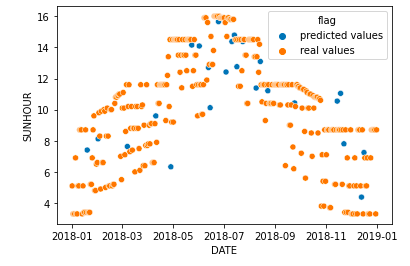

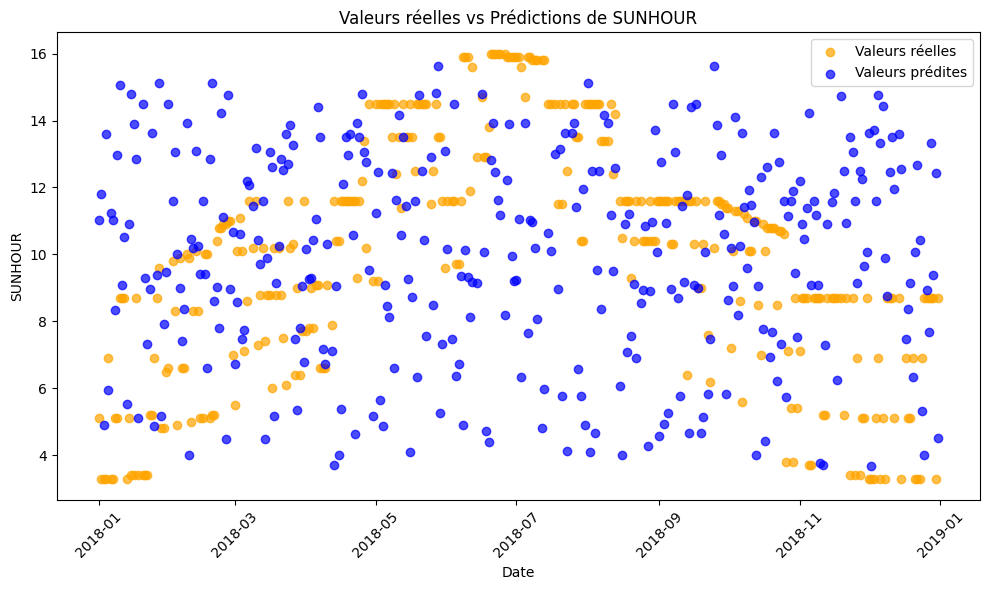

In [24]:
import matplotlib.pyplot as plt

# Ajouter une colonne 'date' si ce n'est pas déjà fait
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Création du scatterplot
plt.figure(figsize=(10, 6))

# Tracer les valeurs réelles (en orange)
plt.scatter(df_merged['date'], df_merged['SUNHOUR'], color='orange', label='Valeurs réelles', alpha=0.7)

# Tracer les valeurs prédites (en bleu)
plt.scatter(df_merged['date'], df_merged['predicted_SUNHOUR'], color='blue', label='Valeurs prédites', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Date')
plt.ylabel('SUNHOUR')
plt.title('Valeurs réelles vs Prédictions de SUNHOUR')

# Ajouter une légende
plt.legend()

# Améliorer la lisibilité des dates sur l'axe des X
plt.xticks(rotation=45)

# Afficher le plot
plt.tight_layout()
plt.show()


Que signifie la superposition des cercles dans le scatterplot ?

In [ ]:
#Il y a des erreurs de prédiction